# **หัวข้อเรื่อง** : นานเท่าไหร่กว่าลูกค้าจะเลิกใช้บริการด้วย Survival Analysis

### แรงบรรดาลใจในการเลือกหัวข้อนี้
ในงานครั้งนี้ต้องการนำปัจจัยที่สำคัญจากการวิเคราะห์เรื่อง "ปัจจัยที่ส่งผลต่อการเลิกใช้บริการ (Customer Churn) ด้วย Logistic regression" คือ internertService Contract เเละ OnlineSecurity เพื่อศึกษาระยะเวลาที่ลูกค้าจะเลิกใช้บริการด้วย Survival Analysis


###  ข้อมูล : เเหล่งที่มา https://www.kaggle.com/blastchar/telco-customer-churn/notebooks

####ตัวเเปร
- customer ID: รหัสลูกค้า
- gender: ไม่ว่าลูกค้าจะเป็นชายหรือหญิง(0,1)
- SeniorCitizen: ลูกค้าเป็นผู้สูงอายุหรือไม่ (1, 0)
- Partner: ไม่ว่าลูกค้าจะมีหุ้นส่วนหรือไม่ (ใช่,ไม่ใช่)
- Dependents: ลูกค้ามีผู้อยู่ในอุปการะหรือไม่ (ใช่,ไม่ใช่)
- tenure: จำนวนเดือนที่ลูกค้าอยู่กับบริษัท
- PhoneService: ไม่ว่าลูกค้าจะมีบริการโทรศัพท์หรือไม่ (ใช่,ไม่ใช่)
- MultipleLines: ลูกค้ามีหลายLinesหรือไม่ (ใช่,ไม่ใช่,ไม่มีโทรศัพท์)
- InternetService: ผู้ให้บริการอินเทอร์เน็ตของลูกค้า (DSL, Fiber optic, No)
- OnlineSecurity: ลูกค้ามีความปลอดภัยทางออนไลน์หรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- OnlineBackup: ลูกค้ามีการสำรองข้อมูลออนไลน์หรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- DeviceProtection: ไม่ว่าลูกค้าจะมีการป้องกันอุปกรณ์หรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- TechSupport: ลูกค้ามีการสนับสนุนด้านเทคนิคหรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- StreamingTV: ไม่ว่าลูกค้าจะสตรีมทีวีหรือไม่(ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- StreamingMovies: ลูกค้ามีการสตรีมภาพยนตร์หรือไม่ (ใช่,ไม่ใช่,ไม่มีบริการอินเทอร์เน็ต)
- Contract : ระยะสัญญาของลูกค้า (เดือนต่อเดือนหนึ่งปีสองปี)
- PaperlessBilling: ลูกค้ามีการเรียกเก็บเงินแบบไม่ใช้กระดาษหรือไม่ (ใช่,ไม่ใช่)
- PaymentMethod: วิธีการชำระเงินของลูกค้า (เช็คอิเล็กทรอนิกส์,เช็คไปรษณีย์โอนเงิน,ผ่านธนาคาร (อัตโนมัติ) ,บัตรเครดิต (อัตโนมัติ))
- MonthlyCharges: จำนวนเงินที่เรียกเก็บจากลูกค้ารายเดือน
- TotalCharges: จำนวนเงินทั้งหมดที่เรียกเก็บจากลูกค้า
- Churn: ลูกค้าเลิกใช้บริการหรือไม่ (ใช่,ไม่)


### วัตถุประสงค์ : 


1.   เพื่อศึกษาปัจจัยของค้าว่านานเท่าไหร่กว่าลูกค้าจะเลิกใช้บริการ



## import Data

In [1]:
!pip install lifelines

     |████████████████████████████████| 348 kB 4.2 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=e14efae4b9c5a4f5514c3838d4bb3c9b80e56f1bac073ac89ad808bc5232c4bc
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['tenure'] = df['tenure'].astype(float)
df['Churn'] = df['Churn'] == 'Yes'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


## Kaplan-Meier survival curve

In [4]:
# fitting kmf to churn data
t = df['tenure'].values
churn = df['Churn'].values

churn

array([False, False,  True, ..., False,  True, False])

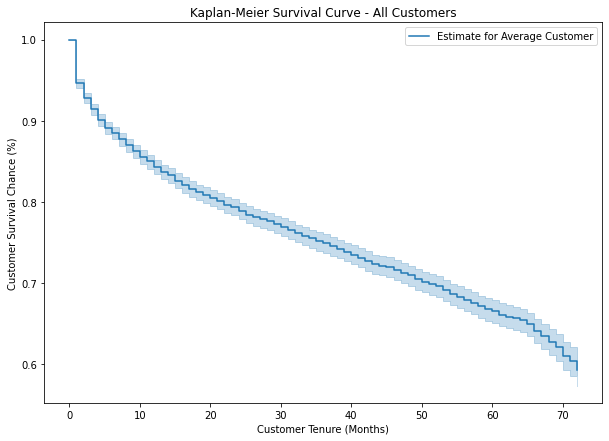

In [5]:
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, event_observed=churn, label='Estimate for Average Customer')

# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve - All Customers')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

* เส้นโค้ง Survival แบบสะสม พบว่า หลังจาก 20 เดือน โอกาสที่ลูกค้าจะไม่ยกเลิกบริการมี 80% (20% เลิกใช้บริการ) แม้ว่าหลังจากผ่านไป 72 เดือน บริษัทก็สามารถรักษาลูกค้าไว้ได้ 60% (40% เลิกใช้บริการ)

In [6]:
features_to_drop = ['customerID', 'gender', 'PhoneService', 'InternetService', 'Churn'] ## ตัวแปรที่ไม่มมีความสัมพันธ์กับ CHurn ด้วย Chi - sq
# engineering numeric columns for Cox Proportional Hazard estimation
churn = df.drop(features_to_drop, axis=1).copy()

# convert some stuff to integers
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn['TotalCharges'].fillna(0, inplace=True)

In [7]:
churn.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1.0,No phone service,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34.0,No,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2.0,No,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45.0,No phone service,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2.0,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
def uni_col_val(df):
    for column in df:
        if churn[column].dtype == 'object':
            print(f'{column}  : {churn[column].unique()}')

print(uni_col_val(churn))

Partner  : ['Yes' 'No']
Dependents  : ['No' 'Yes']
MultipleLines  : ['No phone service' 'No' 'Yes']
OnlineSecurity  : ['No' 'Yes' 'No internet service']
OnlineBackup  : ['Yes' 'No' 'No internet service']
DeviceProtection  : ['No' 'Yes' 'No internet service']
TechSupport  : ['No' 'Yes' 'No internet service']
StreamingTV  : ['No' 'Yes' 'No internet service']
StreamingMovies  : ['No' 'Yes' 'No internet service']
Contract  : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod  : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
None


In [9]:
features_to_drop = ['customerID', 'gender', 'PhoneService', 'InternetService'] ## ตัวแปรที่ไม่มมีความสัมพันธ์กับ CHurn ด้วย Chi - sq
# engineering numeric columns for Cox Proportional Hazard estimation
churn = df.drop(features_to_drop, axis=1).copy()

# convert some stuff to integers
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn['TotalCharges'].fillna(0, inplace=True)

# a lot of variables are encoded as 'Yes' or 'No', lets get these all done at once
binary_features = ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV','StreamingMovies', 'PaperlessBilling']
for feat in binary_features:
    churn[feat] = churn[feat] == 'Yes'
    
# let's one hot encode the remaining categorical features
ohe_features = ['MultipleLines', 'Contract', 'PaymentMethod']
churn = pd.get_dummies(churn, 
                              drop_first=True,
                              columns=ohe_features)

In [10]:
churn.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,True,False,1.0,False,True,False,False,False,False,...,29.85,29.85,False,1,0,0,0,0,1,0
1,0,False,False,34.0,True,False,True,False,False,False,...,56.95,1889.50,False,0,0,1,0,0,0,1
2,0,False,False,2.0,True,True,False,False,False,False,...,53.85,108.15,True,0,0,0,0,0,0,1
3,0,False,False,45.0,True,False,True,True,False,False,...,42.30,1840.75,False,1,0,1,0,0,0,0
4,0,False,False,2.0,False,False,False,False,False,False,...,70.70,151.65,True,0,0,0,0,0,1,0


In [11]:
def uni_col_val(df):
    for column in df:
        if churn[column].dtype == 'object':
            print(f'{column}  : {churn[column].unique()}')

print(uni_col_val(churn))

None


In [12]:
cph = lifelines.CoxPHFitter()
cph.fit(churn, duration_col='tenure', event_col='Churn', show_progress=False)
print(cph.print_summary())

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12688.70
         time fit was run = 2021-12-31 04:16:49 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
SeniorCitizen                           0.03       1.03       0.06            -0.08             0.14                 0.93                 1.16
Partner                                -0.19       0.82       0.06            -0.30            -0.09                 0.74                 0.92
Dependents                             -0.10       0.91       0.07            -0.23             0.04                 0.79                 1.04
OnlineSecurity                         -0.38       0.68       0.07            -0.51            -0.25                 0.60                 0.78
OnlineBackup                           -0.29       0.75       0.06            -0.40            -0.18                 0.67                 0.83
DeviceProtection                       -0.16       0.85       0.06            -0.27            -0.05                 0.76                 0.95
TechSupport                            -0.28       0.76       0.07            -0.41            -0.15                 0.67                 0.86
StreamingTV                            -0.27       0.77       0.06            -0.38            -0.15                 0.68                 0.86
StreamingMovies                        -0.26       0.77       0.06            -0.38            -0.14                 0.69                 0.87
PaperlessBilling                        0.16       1.17       0.06             0.05             0.27                 1.05                 1.31
MonthlyCharges                          0.07       1.07       0.00             0.06             0.07                 1.06                 1.07
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
MultipleLines_No phone service          0.64       1.89       0.12             0.41             0.87                 1.51                 2.38
MultipleLines_Yes                      -0.20       0.82       0.05            -0.30            -0.09                 0.74                 0.91
Contract_One year                      -1.40       0.25       0.10            -1.60            -1.20                 0.20                 0.30
Contract_Two year                      -4.05       0.02       0.20            -4.43            -3.66                 0.01                 0.03
PaymentMethod_Credit card (automatic)  -0.01       0.99       0.09            -0.18             0.17                 0.83                 1.19
PaymentMethod_Electronic check          0.38       1.46       0.07             0.24             0.52                 1.27                 1.69
PaymentMethod_Mailed check              0.52       1.68       0.09             0.35             0.69                 1.42                 1.99

                                           z      p   -log2(p)
covariate                                                     
SeniorCitizen                           0.60   0.55       0.87
Partner                                -3.52 <0.005      11.20
Dependents                             -1.39   0.17       2.60
OnlineSecurity                         -5.65 <0.005      25.89
OnlineBackup                           -5.22 <0.005      22.41
DeviceProtection                       -2.85 <0.005       7.85
TechSupport                            -4.19 <0.005      15.15
StreamingTV                            -4.46 <0.005      16.86
S

None


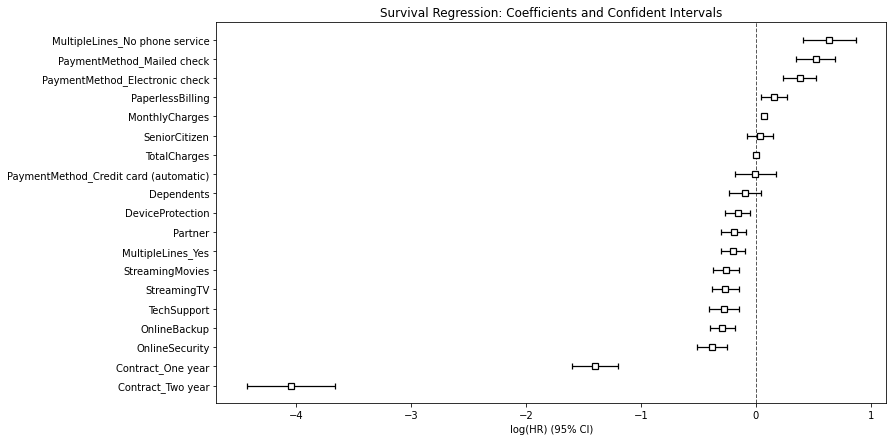

In [13]:
# plotting coefficients
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);

In [14]:
# function for creating Kaplan-Meier curve plots segmented
# by categorical variables
def plot_categorical_survival(feature, t='tenure', event='Churn', df=df, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat)

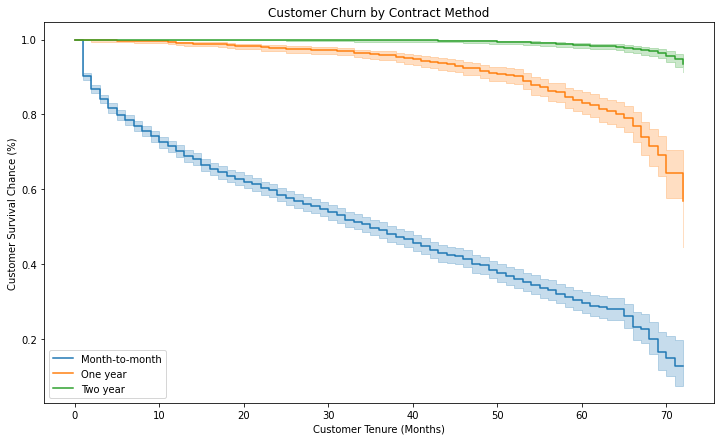

In [15]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='Contract', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by Contract Method')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Chance (%)')
plt.show()

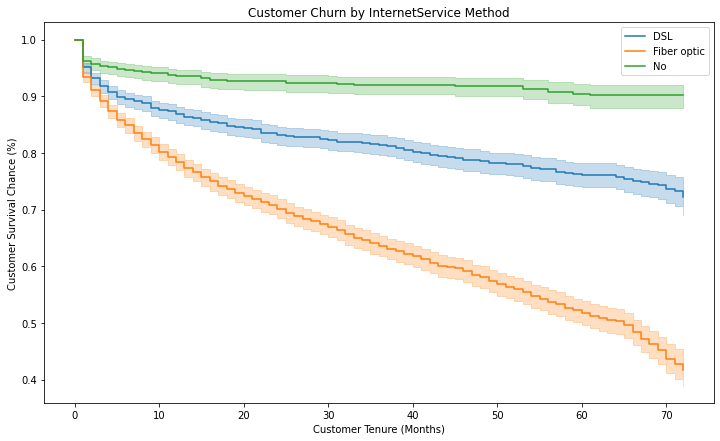

In [16]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='InternetService', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by InternetService Method')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Chance (%)')
plt.show()

In [17]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

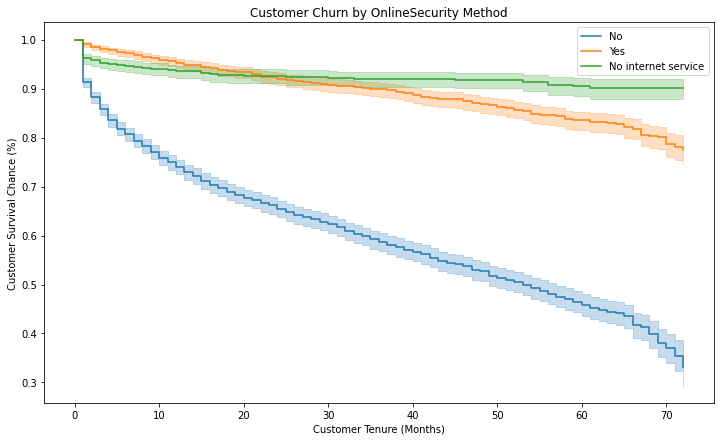

In [18]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='OnlineSecurity', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by OnlineSecurity Method')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Chance (%)')
plt.show()

#### ผลลัพธ์จากการนำปจจัยที่สำคัญมาเเบ่งกลุ่มเพื่อดูผลลัพธ์เทียบกันได้
1. วิเคราะห์ตามประเภทของ Contract ได้แก่ กลุ่มลูกค้าที่ต่อสัญญาเเบบ Month-to-month, กลุ่มลูกค้าที่ต่อสัญญาเเบบ One year และกลุ่มลูกค้าที่ต่อสัญญาเเบบ Two year จากกราฟ จะเห็นว่ากลุ่มลูกค้าที่ต่อสัญญาเเบบ Month-to-month มีอัตราการ churn เยอะกว่าลูกค้ากลุ่มที่ต่อสัญญาเเบบ One year และTwo year โดยเมื่อระยะเวลาผ่านไป 70 กว่าเดือน ลูกค้าที่ย้ายค่ายมีทั้งหมดมากกว่า 80% จากลูกค้าทั้งหมด ในขณะที่กลุ่มลูกค้าที่ที่ต่อสัญญาเเบบ Two year นั้นมี churn rate ที่ต่ำมาก โดยเมื่อเวลาผ่านไปนั้น กลุ่มลูกค้าที่ย้ายค่ายต่ำกว่า 5%

2. วิเคราะห์ตามประเภทของ Online Security ได้แก่ กลุ่มลูกค้าที่ใช้บริการ Online Security, กลุ่มลูกค้าที่ไม่ใช้บริการ Online Security และกลุ่มลูกค้าที่ไม่มีบริการอินเทอร์เน็ต จากกราฟ จะเห็นว่ากลุ่มลูกค้าไม่ใช้บริการ Online Security มีอัตราการ churn เยอะกว่ากลุ่มลูกค้าใช้บริการ Online Security และไม่มีบริการอินเทอร์เน็ต โดยเมื่อระยะเวลาผ่านไป 70 กว่าเดือน ลูกค้าที่ย้ายค่ายมีทั้งหมดมากกว่า 65% จากลูกค้าทั้งหมด ในขณะที่กลุ่มลูกค้าที่ไม่มีบริการอินเทอร์เน็ต นั้นมี churn rate ที่ต่ำมาก โดยเมื่อเวลาผ่านไปนั้น กลุ่มลูกค้าที่ย้ายค่ายต่ำกว่า 5%

3. วิเคราะห์ตามประเภทของ internet service ได้แก่ กลุ่มลูกค้าที่ไม่รับ internet service, กลุ่มลูกค้าที่ติดตั้ง DSL และกลุ่มลูกค้าที่รับ Fiber optic จากกราฟ จะเห็นว่ากลุ่มลูกค้า Fiber optic มีอัตราการ churn เยอะกว่าลูกค้ากลุ่ม DSL และไม่ติดตั้งเลย โดยเมื่อระยะเวลาผ่านไป 70 กว่าเดือน ลูกค้าที่ย้ายค่ายมีทั้งหมดมากกว่า 60% จากลูกค้าทั้งหมด ในขณะที่กลุ่มลูกค้าที่ไม่ติดตั้ง internet service นั้นมี churn rate ที่ต่ำมาก โดยเมื่อเวลาผ่านไปนั้น กลุ่มลูกค้าที่ย้ายค่ายต่ำกว่า 10%


